# 모델 복잡성

## KNN 예제

### 라이브러리와 데이터

In [1]:
# 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# 데이터 읽기
data = pd.read_csv('data02_iris_noisy.csv')
X = data[ ['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width'] ]
y = data['Species']
print( X.shape, y.shape )

(100, 4) (100,)


In [4]:
# 훈련/평가 데이터의 분리
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=1)

In [5]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(60, 4) (40, 4) (60,) (40,)


### KNN 모델 훈련

In [7]:
# 모델 설정
from sklearn.neighbors import KNeighborsClassifier
f = KNeighborsClassifier(n_neighbors=5)

In [8]:
# 모델 훈련
f.fit(xtrain, ytrain)

KNeighborsClassifier()

In [10]:
# 모델을 이용한 예측
yhat_test = f.predict(xtest)
print(yhat_test)

[1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0
 1 1 0]


In [12]:
# 모델 평가: 정확도 측정
f.score(xtest,ytest)

0.75

### 파라메터에 변화에 따른 정확도 변화

In [18]:
# K를 1에서 50까지 변화시키면서 훈련/평가 데이터의 정확도를 측정
klist = np.arange(1,51)
train_acc = []
test_acc = []
for k in klist:
  f = KNeighborsClassifier(n_neighbors=k)
  f.fit(xtrain,ytrain)
  train_acc.append( f.score(xtrain,ytrain) )
  test_acc.append( f.score(xtest,ytest) )

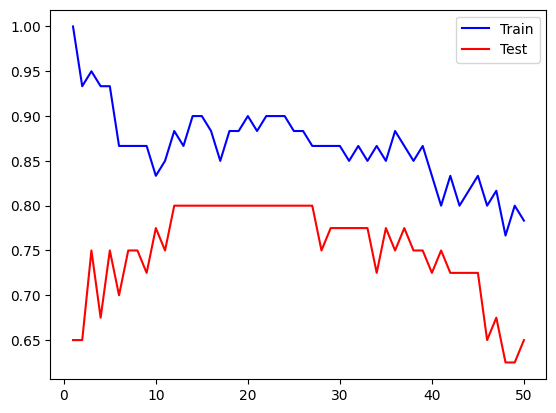

In [22]:
# 그래프로 표현
plt.plot(klist,train_acc,'b-',klist,test_acc,'r-')
plt.legend(labels=['Train','Test'])
plt.show()

## 연습문제

1. 아래의 순서에 따라 diabetes 데이터를 읽어 Y변수를 다른 변수로 예측하는 KNN 모델을 만들고, 앞선 예제를 반복하시오.<br>
(1) 데이터를 읽어 훈련/평가 데이터로 나누시오. 평가 데이터의 비율은 0.4로 하고, random_state는 1로 세팅하시오.<br>
(2) K의 값을 5로 하고, 훈련 데이터를 이용하여 모델을 훈련하시오. f.score()를 이용하여 평가 데이터에서 모델의 성능을 측정하시오. <br>
(3) K의 값을 1에서 100까지 변경하면서 훈련 데이터와 평가 데이터에서 성능을 측정하여 그래프로 나타내시오.